In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163338 sha256=e586ec2cb5ddd92899b672057eac47bdce54f7a82d89845fef56288411b8449e
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Data acquisition of the MOVIE dataset
df_movie=pd.read_csv('/movies.dat', sep = '::', engine='python', encoding='latin1')
df_movie.columns =['MovieIDs','MovieName','Category']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [6]:
df_movie.shape

(3882, 3)

In [12]:
#Data acquisition of the rating dataset
df_rating = pd.read_csv("/ratings.dat",sep='::', engine='python', encoding='latin1')
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [13]:
df_rating.shape

(1000208, 4)

In [9]:
#Data acquisition of the users dataset
df_user = pd.read_csv("/users.dat",sep='::',engine='python', encoding='latin1')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [10]:
df_user.shape

(6039, 5)

In [14]:
# Merge User and Ratings data on 'MovieID'
User_ratings = pd.merge(df_user, df_rating, left_on='UserID', right_on='ID')

# Display the merged DataFrame
User_ratings.head()

,UserID,Gender,Age,Occupation,Zip-code,ID,MovieID,Ratings,TimeStamp
0,2,M,56,16,70072,2,1357,5,978298709
1,2,M,56,16,70072,2,3068,4,978299000
2,2,M,56,16,70072,2,1537,4,978299620
3,2,M,56,16,70072,2,647,3,978299351
4,2,M,56,16,70072,2,2194,4,978299297


In [15]:
df = pd.merge(User_ratings, df_movie, left_on='MovieID', right_on='MovieIDs')
df.head()

,UserID,Gender,Age,Occupation,Zip-code,ID,MovieID,Ratings,TimeStamp,MovieIDs,MovieName,Category
0,2,M,56,16,70072,2,1357,5,978298709,1357,Shine (1996),Drama|Romance
1,8,M,25,12,11413,8,1357,4,978230800,1357,Shine (1996),Drama|Romance
2,10,F,35,1,95370,10,1357,5,978227625,1357,Shine (1996),Drama|Romance
3,18,F,18,3,95825,18,1357,5,978156876,1357,Shine (1996),Drama|Romance
4,33,M,45,3,55421,33,1357,4,978109488,1357,Shine (1996),Drama|Romance


In [18]:
df = df.drop(['ID', 'MovieIDs'], axis= 1)

In [19]:
df.head()

,UserID,Gender,Age,Occupation,MovieID,Ratings,MovieName,Category
0,2,M,56,16,1357,5,Shine (1996),Drama|Romance
1,8,M,25,12,1357,4,Shine (1996),Drama|Romance
2,10,F,35,1,1357,5,Shine (1996),Drama|Romance
3,18,F,18,3,1357,5,Shine (1996),Drama|Romance
4,33,M,45,3,1357,4,Shine (1996),Drama|Romance


In [20]:
df.shape

(998080, 8)

In [21]:
df.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
MovieID       0
Ratings       0
MovieName     0
Category      0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998080 entries, 0 to 998079
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   UserID      998080 non-null  int64 
 1   Gender      998080 non-null  object
 2   Age         998080 non-null  int64 
 3   Occupation  998080 non-null  int64 
 4   MovieID     998080 non-null  int64 
 5   Ratings     998080 non-null  int64 
 6   MovieName   998080 non-null  object
 7   Category    998080 non-null  object
dtypes: int64(5), object(3)
memory usage: 68.5+ MB


In [16]:
df.describe()

,UserID,Age,Occupation,ID,MovieID,Ratings,TimeStamp,MovieIDs
count,998080.000000,998080.000000,998080.000000,998080.000000,998080.000000,998080.000000,9.980800e+05,998080.000000
mean,3024.608884,29.744052,8.035970,3024.608884,1869.434325,3.580357,9.722469e+08,1869.434325
std,1728.273821,11.749987,6.531805,1728.273821,1093.878797,1.117300,1.215794e+07,1093.878797
min,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,9.567039e+08,2.000000
25%,1506.000000,25.000000,2.000000,1506.000000,1034.000000,3.000000,9.653027e+08,1034.000000
50%,3070.000000,25.000000,7.000000,3070.000000,1845.000000,4.000000,9.730190e+08,1845.000000
75%,4476.000000,35.000000,14.000000,4476.000000,2772.000000,4.000000,9.752211e+08,2772.000000
max,6040.000000,56.000000,20.000000,6040.000000,3952.000000,5.000000,1.046455e+09,3952.000000


In [23]:
df.nunique()

UserID        6039
Gender           2
Age              7
Occupation      21
MovieID       3705
Ratings          5
MovieName     3705
Category       301
dtype: int64

In [ ]:
# drop zip-code and timestamps

df = df.drop(['Zip-code', 'TimeStamp'], axis= 1)

In [25]:
df.head()

,UserID,Gender,Age,Occupation,MovieID,Ratings,MovieName,Category
0,2,M,56,16,1357,5,Shine (1996),Drama|Romance
1,8,M,25,12,1357,4,Shine (1996),Drama|Romance
2,10,F,35,1,1357,5,Shine (1996),Drama|Romance
3,18,F,18,3,1357,5,Shine (1996),Drama|Romance
4,33,M,45,3,1357,4,Shine (1996),Drama|Romance


In [28]:
# EXPLORATARY DATA ANALYSIS

In [29]:
# movie count vs ratings
rating_count = df.groupby('MovieID')['Ratings'].count()
rating_count.sort_values(ascending=False)

MovieID
2858    3428
1196    2990
260     2990
1210    2883
480     2672
        ... 
3237       1
763        1
624        1
2563       1
3290       1
Name: Ratings, Length: 3705, dtype: int64

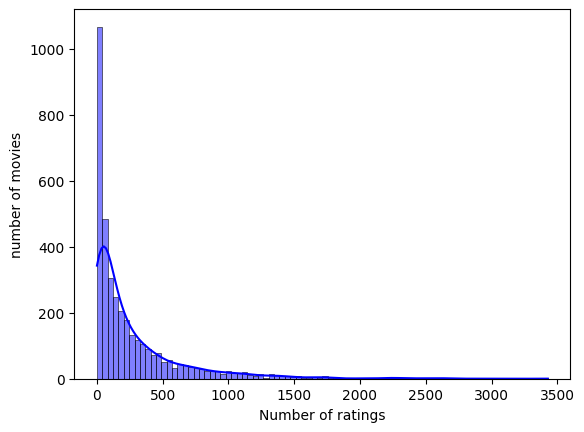

In [30]:
sns.histplot(rating_count, kde=True,color="b")
plt.xlabel('Number of ratings')
plt.ylabel('number of movies')
plt.show()

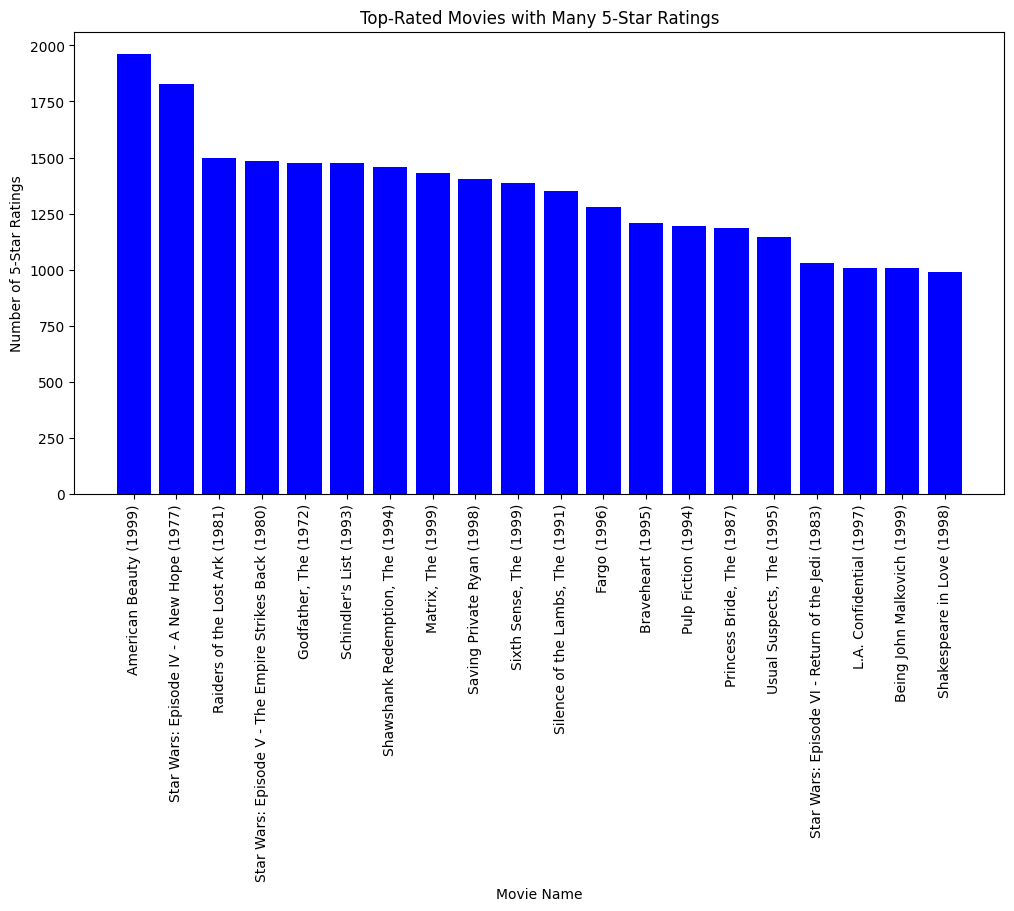

In [31]:
# Group by movie MovieName and count 5-star ratings
movie_ratings = df[df['Ratings'] == 5].groupby('MovieName')['Ratings'].count().reset_index()

# Movies with the highest ratings
top_rated_movies = movie_ratings.sort_values(by='Ratings', ascending=False)

# bar plot for the top-rated movies
plt.figure(figsize=(12, 6))
plt.bar(top_rated_movies['MovieName'][:20], top_rated_movies['Ratings'][:20], color='b')
plt.xlabel('Movie Name')
plt.ylabel('Number of 5-Star Ratings')
plt.title('Top-Rated Movies with Many 5-Star Ratings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

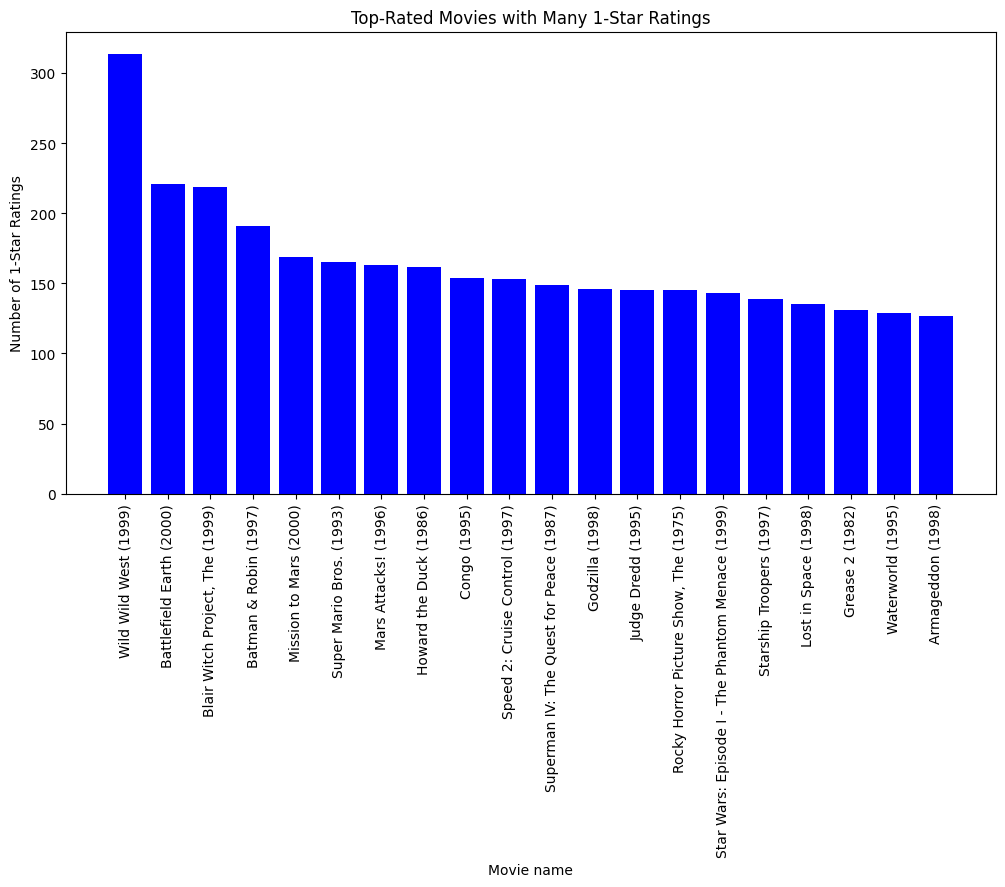

In [32]:
# Group by movie MovieName and count 1-star ratings
movie_ratings = df[df['Ratings'] == 1].groupby('MovieName')['Ratings'].count().reset_index()

# Movies with the highest ratings
top_rated_movies = movie_ratings.sort_values(by='Ratings', ascending=False)

# bar plot for the top-rated movies
plt.figure(figsize=(12, 6))
plt.bar(top_rated_movies['MovieName'][:20], top_rated_movies['Ratings'][:20], color='b')
plt.xlabel('Movie name')
plt.ylabel('Number of 1-Star Ratings')
plt.title('Top-Rated Movies with Many 1-Star Ratings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [33]:
df.Category.value_counts()

Comedy                       116880
Drama                        111411
Comedy|Romance                42712
Comedy|Drama                  42244
Drama|Romance                 29169
                              ...  
Drama|Romance|Western            29
Children's|Fantasy               27
Comedy|Film-Noir|Thriller         5
Film-Noir|Horror                  2
Fantasy                           1
Name: Category, Length: 301, dtype: int64

In [34]:
# df = df[~df[df['Category']=='Film-Noir|Horror']]
df = df[~df['Category'].str.contains('Film-Noir|Horror')]
df.Category.value_counts()

Comedy                       116880
Drama                        111411
Comedy|Romance                42712
Comedy|Drama                  42244
Drama|Romance                 29169
                              ...  
Animation|Mystery                41
Adventure|Musical|Romance        30
Drama|Romance|Western            29
Children's|Fantasy               27
Fantasy                           1
Name: Category, Length: 254, dtype: int64

In [35]:
df.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'MovieID', 'Ratings',
       'MovieName', 'Category'],
      dtype='object')

In [38]:
### User-Based Collaborative Filtering
"""
User-Based Collaborative Filtering (UBCF) is a recommendation technique that provides personalized recommendations
to users based on the historical behavior and preferences of other users who are similar to them. UBCF assumes that
users who have interacted with items in similar ways (e.g., rated movies similarly) are likely to have similar tastes
and can benefit from recommendations made to each other.
"""

'\nUser-Based Collaborative Filtering (UBCF) is a recommendation technique that provides personalized recommendations \nto users based on the historical behavior and preferences of other users who are similar to them. UBCF assumes that \nusers who have interacted with items in similar ways (e.g., rated movies similarly) are likely to have similar tastes \nand can benefit from recommendations made to each other.\n'

In [39]:
# Import necessary libraries
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load data into Surprise Dataset
data = df
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['UserID', 'MovieName', 'Ratings']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Define the user-based collaborative filtering model
sim_options = {
    'user_based': True,  # Use user-based collaborative filtering
    'name': 'cosine',
}
model = KNNBasic(sim_options=sim_options)

# Fit the model on the training data
model.fit(trainset)

# Predict ratings on the test set
predictions = model.test(testset)

# Evaluate the model using RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9729
RMSE: 0.972925450984986


In [40]:
df.sample(3)

,UserID,Gender,Age,Occupation,MovieID,Ratings,MovieName,Category
753413,1465,M,50,16,2144,3,Sixteen Candles (1984),Comedy
360405,1272,M,18,20,3186,1,"Girl, Interrupted (1999)",Drama
48238,1259,M,35,7,2858,3,American Beauty (1999),Comedy|Drama


In [41]:
# Testing on custom data
user_id_to_predict = int(input())  # Replace with a user ID from your dataset
movie_name_to_predict = input()  # Replace with a movie name
custom_prediction = model.predict(user_id_to_predict, movie_name_to_predict).est
print(f"Predicted rating for user {user_id_to_predict} and movie {movie_name_to_predict}: {custom_prediction}")

48238
American Beauty
Predicted rating for user 48238 and movie American Beauty: 3.6011569731081927


In [ ]:
### Item-Based Collaborative Filtering
Item-Based Collaborative Filtering (IBCF) is a recommendation technique that suggests items (e.g., movies)
to users based on the similarity of items rather than users. In IBCF, the idea is to recommend items that are
similar to the ones the user has interacted with in the past. This method leverages the assumption that users
who liked or interacted with one item are likely to appreciate items that are similar to it.

In [42]:
# Import necessary libraries
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

In [43]:
# Load data into Surprise Dataset
data = df
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['UserID', 'MovieName', 'Ratings']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Define the item-based collaborative filtering model
sim_options = {
    'user_based': False,  # Use item-based collaborative filtering
    'name': 'cosine',
}
model = KNNBasic(sim_options=sim_options)

# Fit the model on the training data
model.fit(trainset)

# Predict ratings on the test set
predictions = model.test(testset)

# Evaluate the model using RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9910
RMSE: 0.9910251958967599


In [44]:
df.sample(3)

,UserID,Gender,Age,Occupation,MovieID,Ratings,MovieName,Category
941552,881,M,18,14,3177,3,Next Friday (1999),Comedy
956272,5604,M,35,15,306,5,Three Colors: Red (1994),Drama
339688,2842,M,35,17,3148,3,"Cider House Rules, The (1999)",Drama


In [45]:
# Testing on custom data
user_id_to_predict = int(input())  # Replace with a user ID from your dataset
movie_name_to_predict = input()  # Replace with a movie name
custom_prediction = model.predict(user_id_to_predict, movie_name_to_predict).est
print(f"Predicted rating for user {user_id_to_predict} and movie {movie_name_to_predict}: {custom_prediction}")

941552
next friday
Predicted rating for user 941552 and movie next friday: 3.6014115570018874


In [ ]:
### Matrix Factorization Techniques
Matrix Factorization is a class of techniques used in recommendation systems and data analysis that factorizes a matrix
into multiple matrices to capture latent features and relationships between data points. Matrix factorization methods
are widely used in collaborative filtering-based recommendation systems

In [46]:
# Import necessary libraries
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import accuracy

In [47]:
# Load data into Surprise Dataset
data = df
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['UserID', 'MovieName', 'Ratings']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Hyperparameter tuning (example: tuning n_factors)
param_grid = {'n_factors': [10, 20, 30]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)

# Get the best model
best_model = gs.best_estimator['rmse']

# Train the best model
best_model.fit(trainset)

# Predict ratings on the test set
predictions = best_model.test(testset)

# Evaluate the model using RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

RMSE: 0.8665
RMSE: 0.8664683557554447


In [48]:
df.sample(3)

,UserID,Gender,Age,Occupation,MovieID,Ratings,MovieName,Category
813333,5037,M,35,12,1183,4,"English Patient, The (1996)",Drama|Romance|War
130741,550,M,45,8,3421,2,Animal House (1978),Comedy
344016,5811,M,18,4,2712,4,Eyes Wide Shut (1999),Drama


In [50]:
# Testing on custom data
user_id_to_predict = int(input())  # Replace with a user ID from your dataset
movie_name_to_predict = input()  # Replace with a movie name
custom_prediction = best_model.predict(user_id_to_predict, movie_name_to_predict).est
print(f"Predicted rating for user {user_id_to_predict} and movie {movie_name_to_predict}: {custom_prediction}")

130741
animal house
Predicted rating for user 130741 and movie animal house: 3.6019912888032897
